<a href="https://colab.research.google.com/github/DariaBukharina/HWstatprac/blob/main/homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Flight Delay Analysis Report

1. Introduction

This report aims to analyze flight delays to identify patterns and potential problem areas. We will explore various factors such as the time of day, day of the week, airlines, and airports that contribute to delays. The analysis will help in making informed decisions to mitigate delays and improve overall flight efficiency.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv')

# Display the first few rows of each dataset
print(airlines.head())
print(airports.head())
print(flights.head())

<ipython-input-17-14c3ad9dc1fb>:8: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights.csv')


  IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways
  IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447  
   YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1   

1. Delays by Day of the Week

<ipython-input-18-3e48961b1787>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DAY_OF_WEEK', y='DEPARTURE_DELAY', data=delays_by_day, palette='viridis')


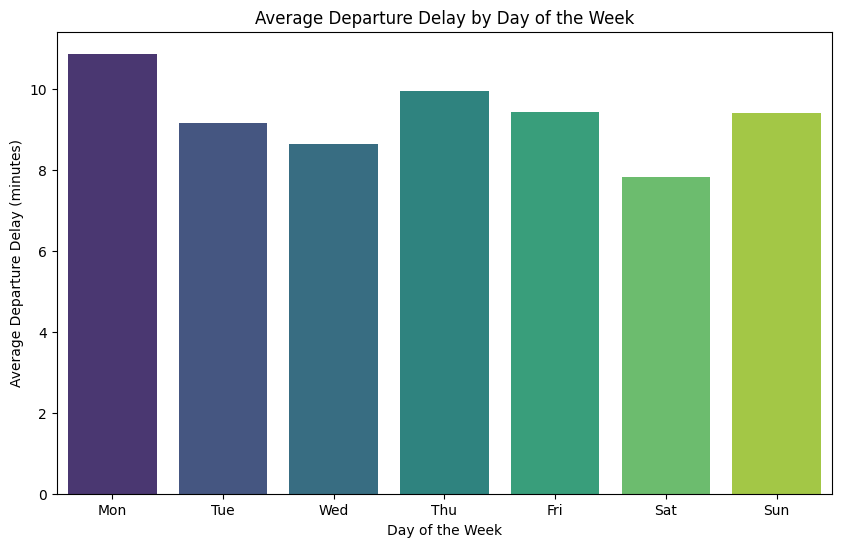

In [18]:
# Group by day of the week and calculate the average delay
delays_by_day = flights.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean().reset_index()

# Plot the average delays by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='DAY_OF_WEEK', y='DEPARTURE_DELAY', data=delays_by_day, palette='viridis')
plt.title('Average Departure Delay by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

Conclusion: Delays are higher during on Monday and Thursday.

2. Delays by Airline

<ipython-input-19-796c165cb587>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AIRLINE_y', y='DEPARTURE_DELAY', data=delays_by_airline, palette='coolwarm')


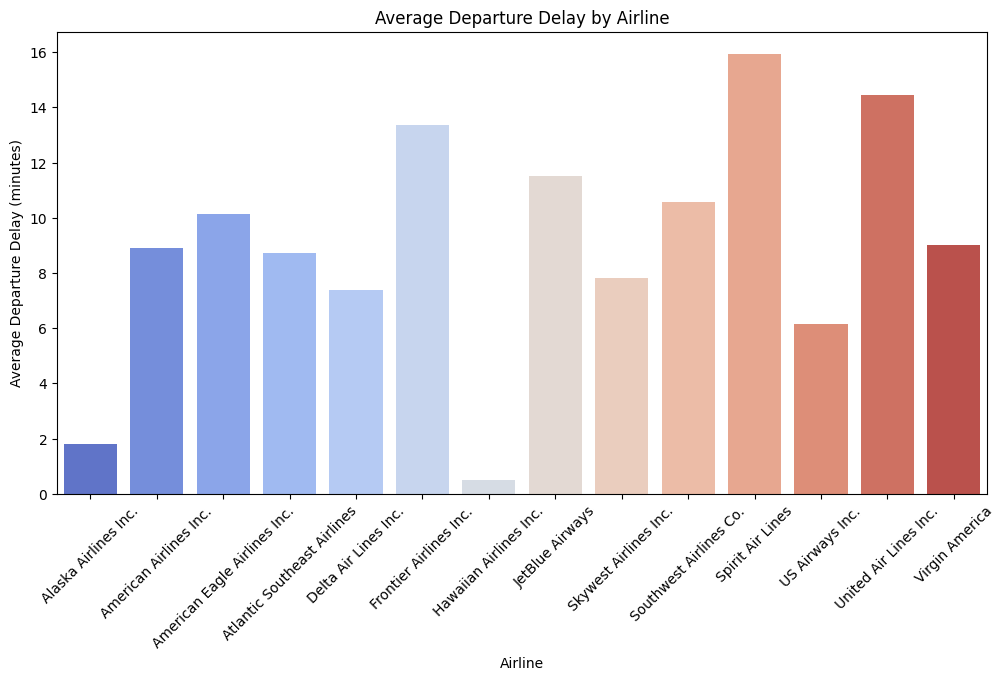

In [19]:
# Merge flights with airlines to get airline names
flights_with_airlines = pd.merge(flights, airlines, left_on='AIRLINE', right_on='IATA_CODE')

# Group by airline and calculate the average delay
delays_by_airline = flights_with_airlines.groupby('AIRLINE_y')['DEPARTURE_DELAY'].mean().reset_index()

# Plot the average delays by airline
plt.figure(figsize=(12, 6))
sns.barplot(x='AIRLINE_y', y='DEPARTURE_DELAY', data=delays_by_airline, palette='coolwarm')
plt.title('Average Departure Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

Conclusion: Spirit Air Lines Inc. and United Air Lines Inc. consistently have higher average delays than others, which could indicate operational inefficiencies or other issues specific to those airlines.

3. Delays by Time of Day

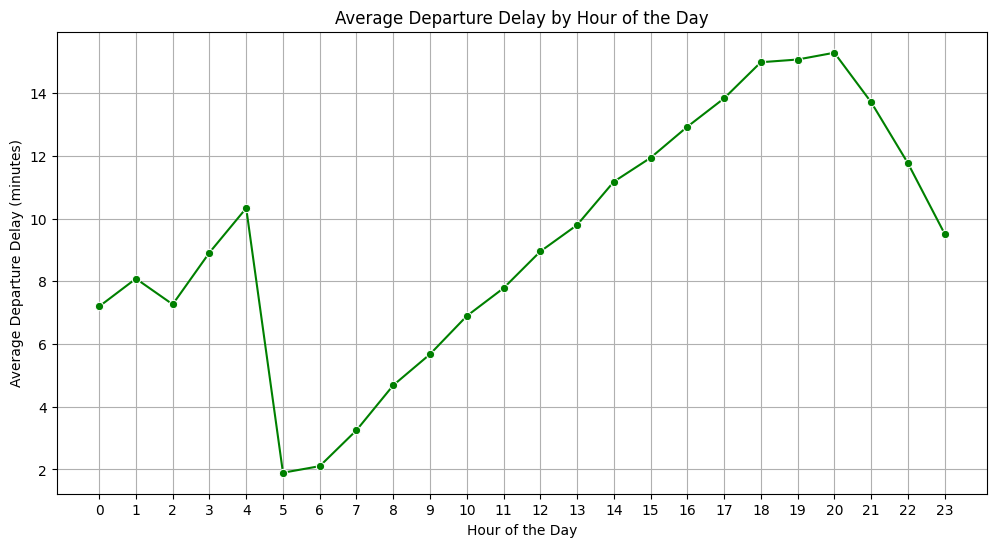

In [20]:
# Convert scheduled departure time to hours
flights['SCHEDULED_DEPARTURE_HOUR'] = flights['SCHEDULED_DEPARTURE'] // 100

# Group by hour and calculate the average delay
delays_by_hour = flights.groupby('SCHEDULED_DEPARTURE_HOUR')['DEPARTURE_DELAY'].mean().reset_index()

# Plot the average delays by hour
plt.figure(figsize=(12, 6))
sns.lineplot(x='SCHEDULED_DEPARTURE_HOUR', y='DEPARTURE_DELAY', data=delays_by_hour, marker='o', color='green')
plt.title('Average Departure Delay by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

Conclusion:
Delays peak in the morning and evening hours, due to the increased workload at airports during these periods. It is recommended to consider the possibility of increasing airport capacity during these hours.

4. Delays by Airport

<ipython-input-22-6a2e377d7d85>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AIRPORT', y='DEPARTURE_DELAY', data=delays_by_airport.nlargest(10, 'DEPARTURE_DELAY'), palette='magma')


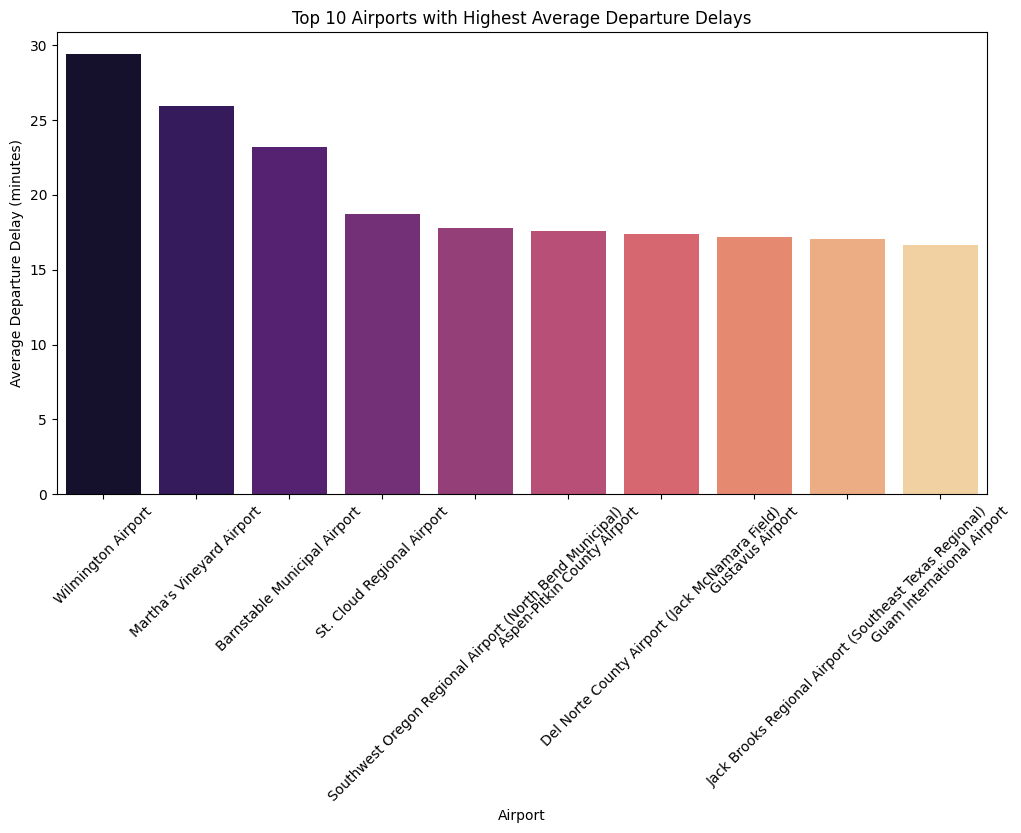

In [22]:
# Merge flights with airports to get airport names
flights_with_airports = pd.merge(flights, airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

# Group by airport and calculate the average delay
delays_by_airport = flights_with_airports.groupby('AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()

# Plot the top 10 airports with the highest average delays
plt.figure(figsize=(12, 6))
sns.barplot(x='AIRPORT', y='DEPARTURE_DELAY', data=delays_by_airport.nlargest(10, 'DEPARTURE_DELAY'), palette='magma')
plt.title('Top 10 Airports with Highest Average Departure Delays')
plt.xlabel('Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.show()

Conclusion: Certain airports have significantly higher average delays, which could be due to congestion, weather conditions, or other local factors.

5. Delays by Month

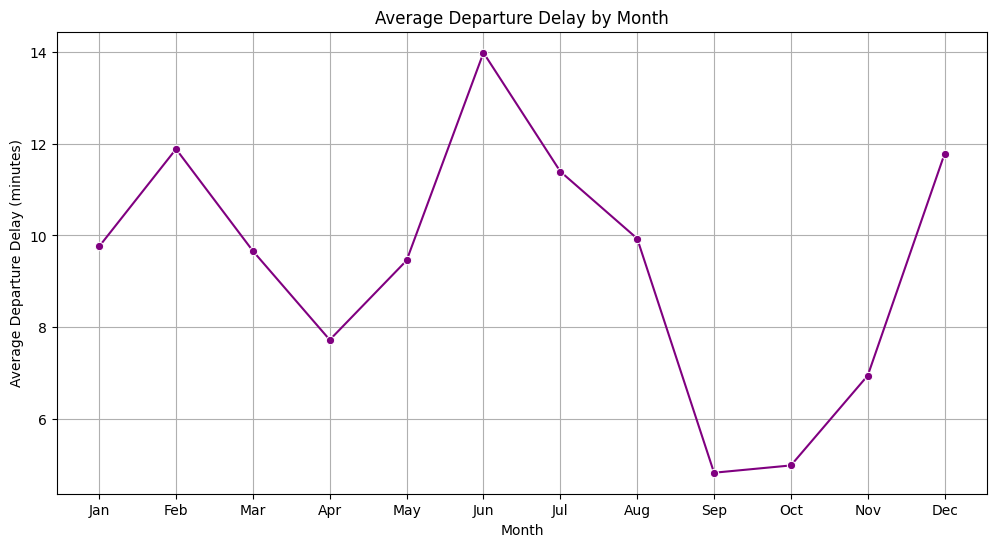

In [23]:
# Group by month and calculate the average delay
delays_by_month = flights.groupby('MONTH')['DEPARTURE_DELAY'].mean().reset_index()

# Plot the average delays by month
plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH', y='DEPARTURE_DELAY', data=delays_by_month, marker='o', color='purple')
plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

Conclusion: Delays are higher during the summer months (June, July) and around the holiday season (December). This could be due to increased travel demand and adverse weather conditions during these periods.

**CONCLUSION**

These findings suggest that addressing congestion during peak hours, improving operational efficiency at specific airports and airlines, and planning for seasonal variations could significantly reduce flight delays.